# Neural Network Example

Build a 2-hidden layers fully connected neural network (a.k.a multilayer perceptron) with TensorFlow.

This example is using some of TensorFlow higher-level wrappers (tf.estimators, tf.layers, tf.metrics, ...), you can check 'neural_network_raw' example for a raw, and more detailed TensorFlow implementation.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flatten and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
# Parameters
learning_rate = 0.1
num_steps = 1000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

In [4]:
# Define the input function for training
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

In [5]:
# Define the neural network
def neural_net(x_dict):
    # TF Estimator input is a dict, in case of multiple inputs
    x = x_dict['images']
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [7]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    
    # Build the neural network
    logits = neural_net(features)
    
    # Predictions
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [8]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/30/33x1bvp143l5hg3kw_qqfk_00000gn/T/tmpAPpDy_', '_save_summary_steps': 100}


In [9]:
# Train the Model
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/30/33x1bvp143l5hg3kw_qqfk_00000gn/T/tmpAPpDy_/model.ckpt.
INFO:tensorflow:loss = 2.35413, step = 1
INFO:tensorflow:global_step/sec: 14.1248
INFO:tensorflow:loss = 0.494573, step = 101 (7.082 sec)
INFO:tensorflow:global_step/sec: 15.3658
INFO:tensorflow:loss = 0.365283, step = 201 (6.561 sec)
INFO:tensorflow:global_step/sec: 5.37266
INFO:tensorflow:loss = 0.206651, step = 301 (18.593 sec)
INFO:tensorflow:global_step/sec: 4.5399
INFO:tensorflow:loss = 0.283285, step = 401 (21.993 sec)
INFO:tensorflow:global_step/sec: 1.66625
INFO:tensorflow:loss = 0.460021, step = 501 (60.015 sec)
INFO:tensorflow:global_step/sec: 12.0386
INFO:tensorflow:loss = 0.474843, step = 601 (8.341 sec)
INFO:tensorflow:global_step/sec: 13.699
INFO:tensorflow:loss = 0.190278, step = 701 (7.266 sec)
INFO:tensorflow:global_step/sec: 23.3229
INFO:tensorflow:loss = 0.29022, step = 801 (4.287 sec)
INFO:tensorflow:global

In [11]:
# Evaluate the Model
# Define the input function for evaluating
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
# Use the Estimator 'evaluate' method
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2017-10-14-17:14:30
INFO:tensorflow:Restoring parameters from /var/folders/30/33x1bvp143l5hg3kw_qqfk_00000gn/T/tmpAPpDy_/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-10-14-17:14:34
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.915, global_step = 1000, loss = 0.291244


{'accuracy': 0.91500002, 'global_step': 1000, 'loss': 0.29124445}

In [12]:
%matplotlib inline

INFO:tensorflow:Restoring parameters from /var/folders/30/33x1bvp143l5hg3kw_qqfk_00000gn/T/tmpAPpDy_/model.ckpt-1000


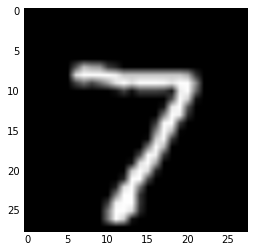

Model prediction: 7


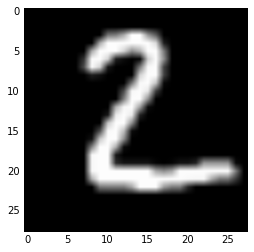

Model prediction: 2


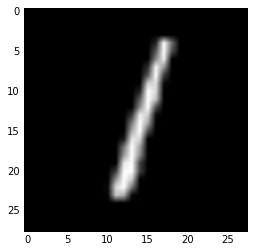

Model prediction: 1


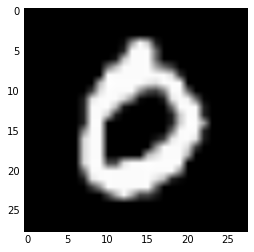

Model prediction: 0


In [13]:
# Predict single images
n_images = 4
# Get images from test set
test_images = mnist.test.images[:n_images]
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)
# Use the model to predict the images class
preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])